## 1) Data understanding, preparation and EDA (25%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data and checking shape

bikesharinginitial_df = pd.read_csv("C:/Users/SunaynaPC/AI_ML/BikeSharingLinearRegressionAssignment/day.csv")
bikesharinginitial_df.shape

(730, 16)

In [3]:
#checking data for null columns

bikesharinginitial_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
#checking numerical columns of the data

bikesharinginitial_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Deriving columns for analysis
#Extracting Day of the month from dteday
bikesharinginitial_df["dayofmonth"]= pd.to_datetime(bikesharinginitial_df[ "dteday"])
bikesharinginitial_df['dayofmonth']=bikesharinginitial_df[ "dayofmonth"].dt.day
bikesharinginitial_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayofmonth
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


<AxesSubplot:>

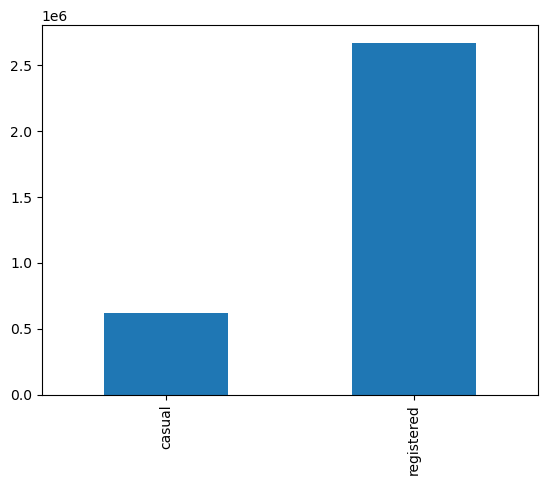

In [6]:
#Checking registered users vs casual users
usertype_df=pd.DataFrame()
usertype_df['casual']=bikesharinginitial_df['casual']
usertype_df['registered']=bikesharinginitial_df['registered']
usertype_df.sum().plot(kind="bar")

#### Removing unwanted columns
Dropping instant column as it just represents the index
Dropping dteday as data is already represented by other columns present
Dropping casual and registered as the count is represented by cnt for all users

In [7]:
bikesharinginitial_df=bikesharinginitial_df.drop(['casual', 'registered','dteday','instant'], axis=1)
bikesharinginitial_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dayofmonth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


#### Mapping columns to categorical values

In [8]:
bikesharinginitial_df["season"] = bikesharinginitial_df["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
bikesharinginitial_df["mnth"] = bikesharinginitial_df["mnth"].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
bikesharinginitial_df["weekday"] = bikesharinginitial_df["weekday"].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [11]:
bikesharinginitial_df["weathersit"] = bikesharinginitial_df["weathersit"].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
bikesharinginitial_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dayofmonth
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


#### Checking for ouliers

<AxesSubplot:ylabel='windspeed'>

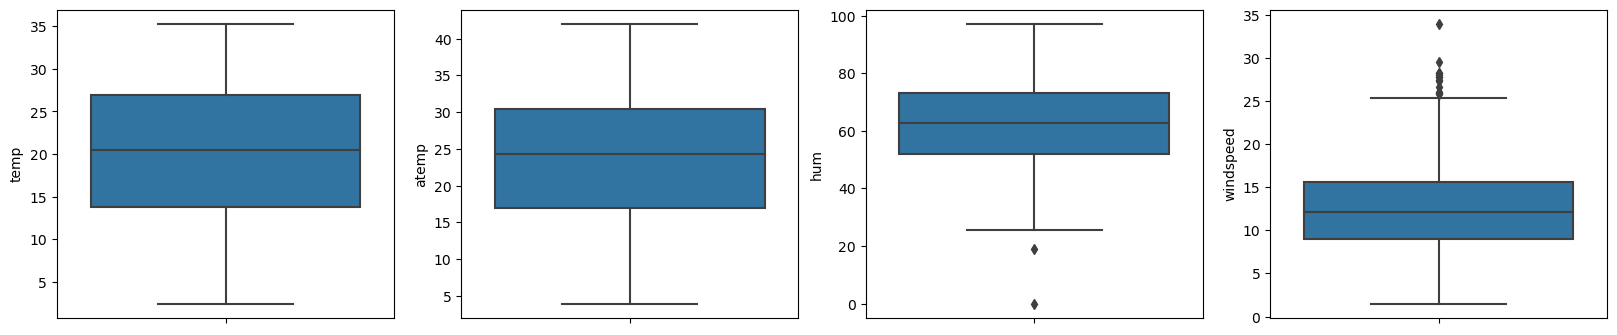

In [13]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.boxplot(y="temp", data=bikesharinginitial_df)
plt.subplot(1,4,2)
sns.boxplot(y="atemp", data=bikesharinginitial_df)
plt.subplot(1,4,3)
sns.boxplot(y="hum", data=bikesharinginitial_df)
plt.subplot(1,4,4)
sns.boxplot(y="windspeed", data=bikesharinginitial_df)

In [14]:
bikesharinginitial_df.shape

(730, 13)

#### removing outliers for windspeed

In [15]:
bikesharinginitial_df = bikesharinginitial_df[bikesharinginitial_df["windspeed"] < bikesharinginitial_df["windspeed"].quantile(0.99)]
bikesharinginitial_df["windspeed"].describe()

count    722.000000
mean      12.584865
std        4.932673
min        1.500244
25%        9.000663
50%       12.041441
75%       15.500919
max       27.292182
Name: windspeed, dtype: float64

<AxesSubplot:ylabel='windspeed'>

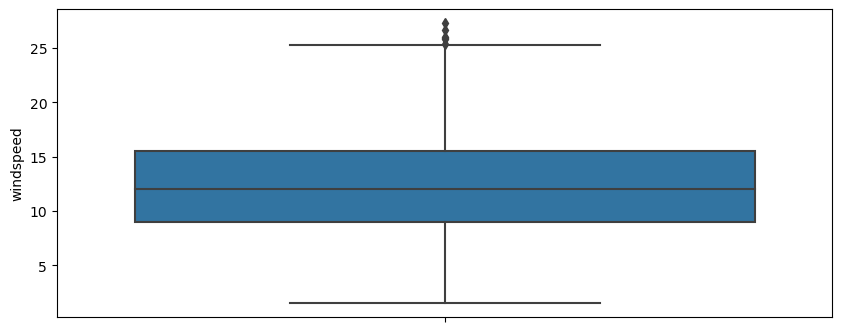

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(y="windspeed", data=bikesharinginitial_df)

In [17]:
bikesharinginitial_df.shape

(722, 13)

#### Checking for numerical values 

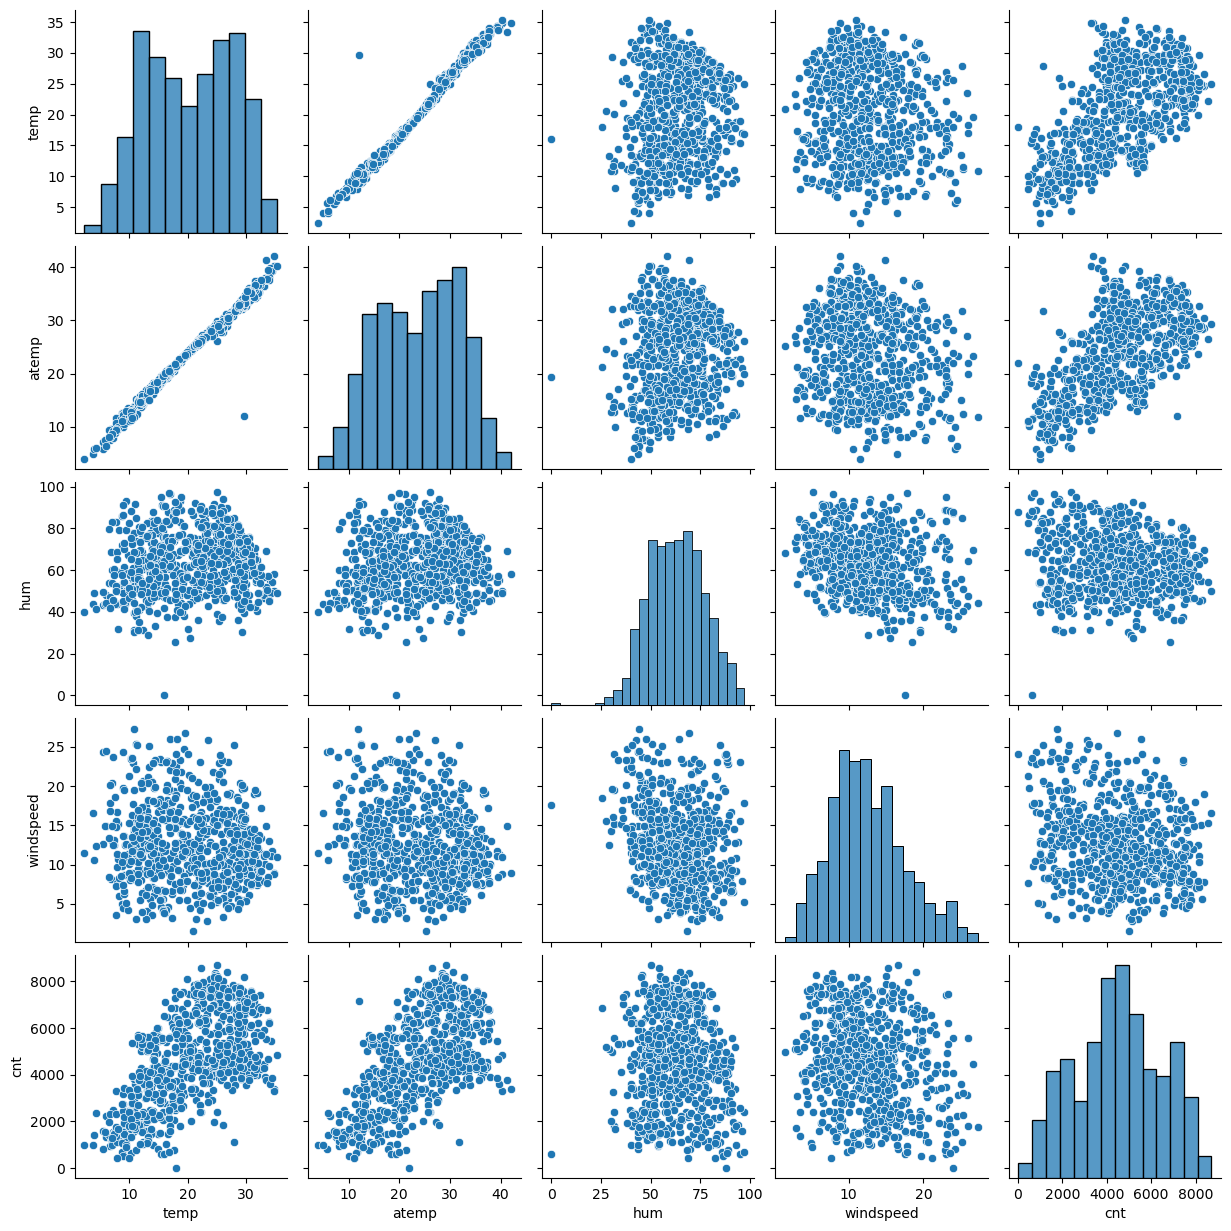

In [18]:
sns.pairplot(data=bikesharinginitial_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

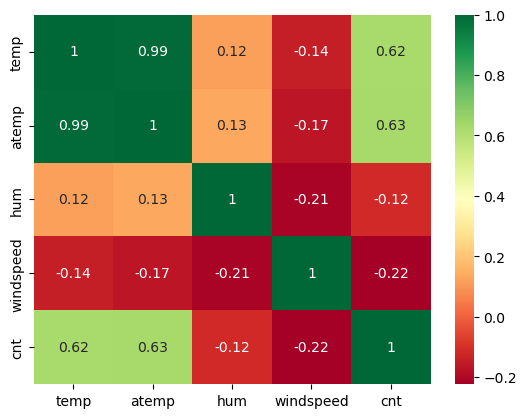

In [19]:
# Checking continuous variables relationship with each other
sns.heatmap(bikesharinginitial_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='RdYlGn', annot = True)
plt.show()

temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

In [20]:
bikesharinginitial_df.drop("atemp", axis=1, inplace=True)

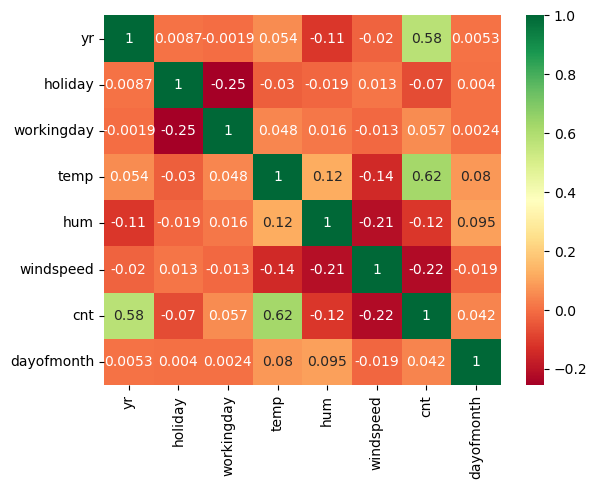

In [21]:
#Correlations for variables
cor=bikesharinginitial_df.corr()
sns.heatmap(cor, cmap="RdYlGn", annot = True)
plt.show()

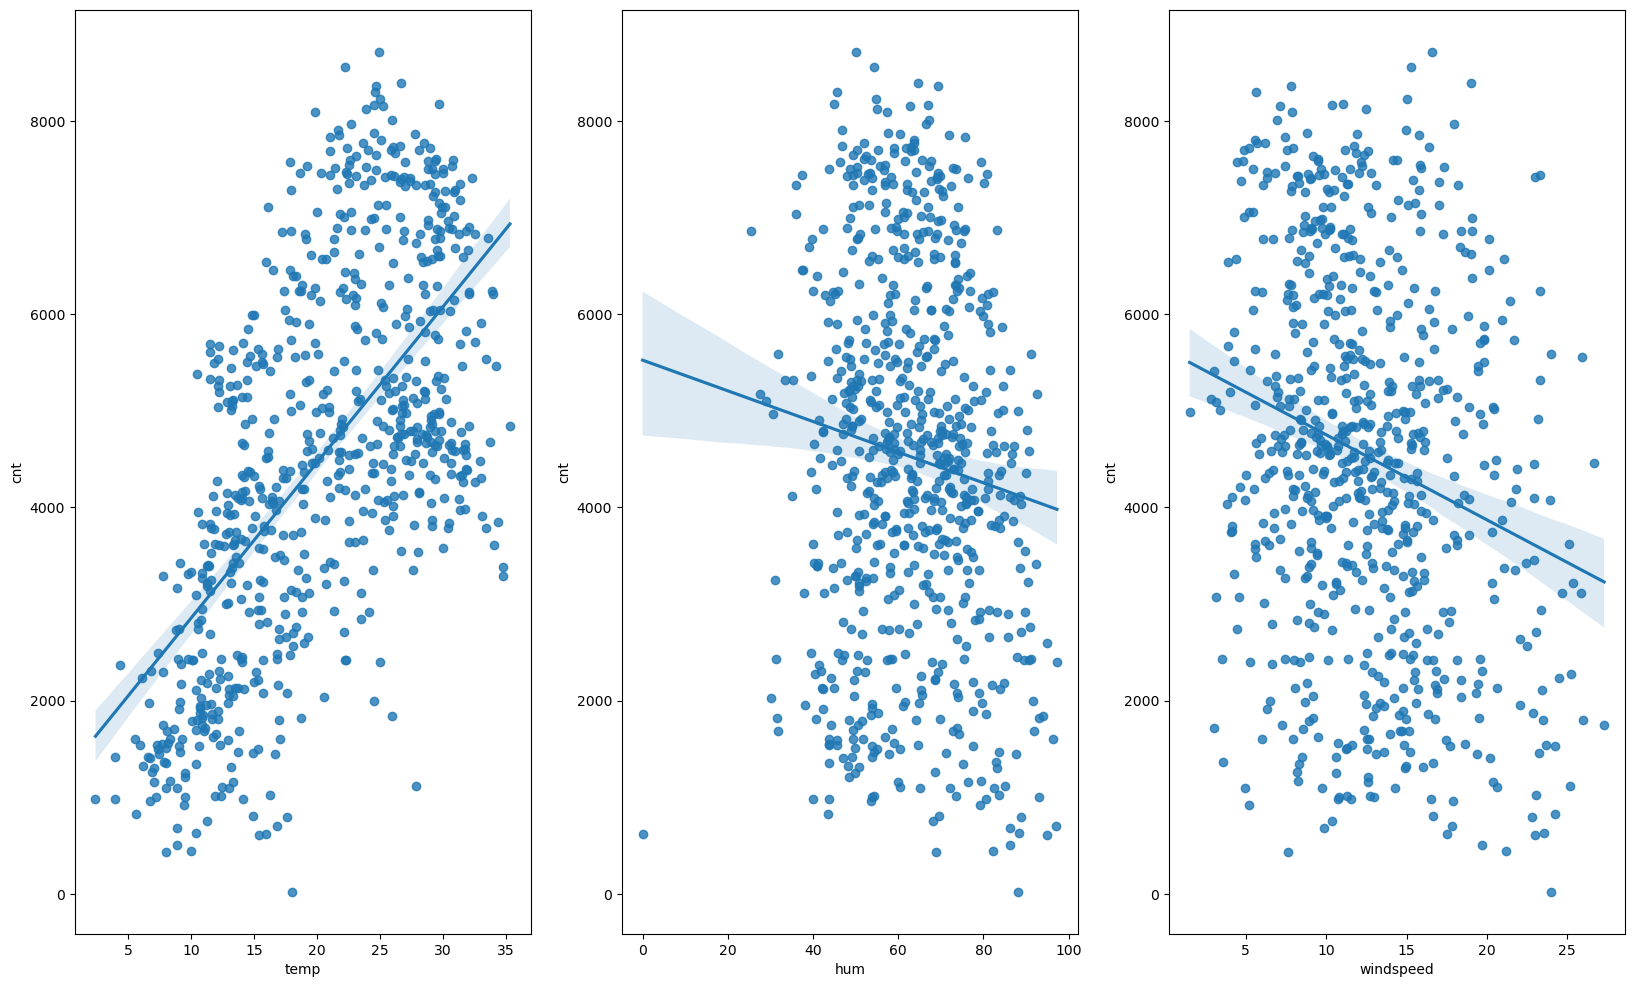

In [23]:
#comparison of count with numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.regplot(y="cnt",x="temp",data=bikesharinginitial_df)
plt.subplot(1,3,2)
sns.regplot(y="cnt",x="hum",data=bikesharinginitial_df)
plt.subplot(1,3,3)
sns.regplot(y="cnt",x="windspeed",data=bikesharinginitial_df)
plt.show()

> Count increase with increase in temp and there a liner relation visiable in both the variables
> Humidity is values are more scattered around and there is no trend observed with change in windspeed.
> Windspeed is values are more scattered around and there is no trend observed with change in windspeed.

In [24]:
bikesharinginitial_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayofmonth
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985,1
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349,1
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562,1
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600,1


Checking count for every season

<AxesSubplot:xlabel='season', ylabel='cnt'>

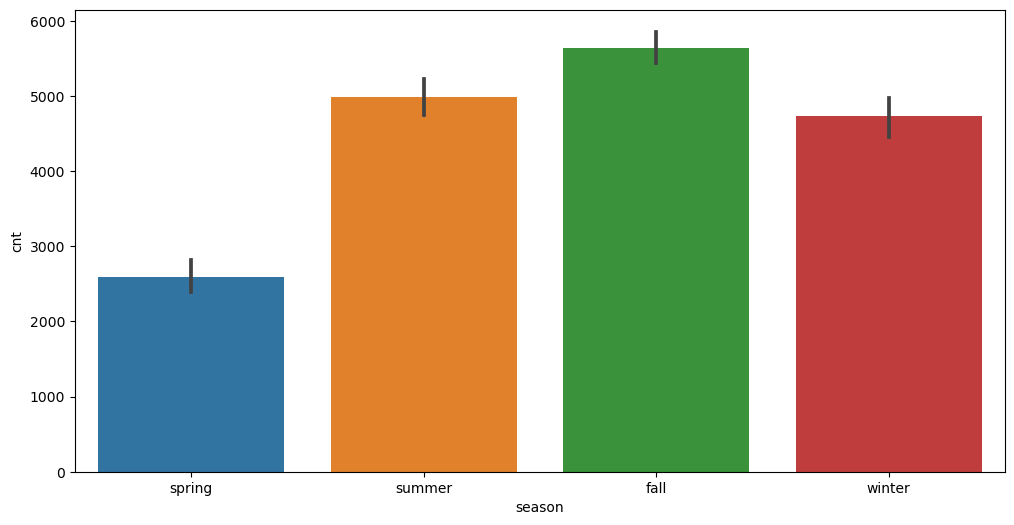

In [25]:
plt.figure(figsize = (12,6))
sns.barplot('season','cnt',data=bikesharinginitial_df)

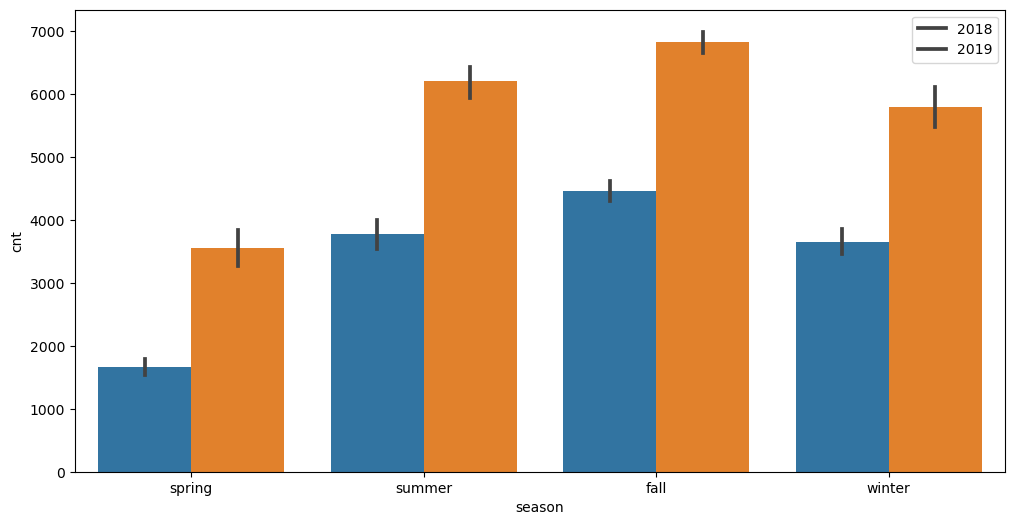

In [26]:
plt.figure(figsize = (12,6))
sns.barplot('season','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

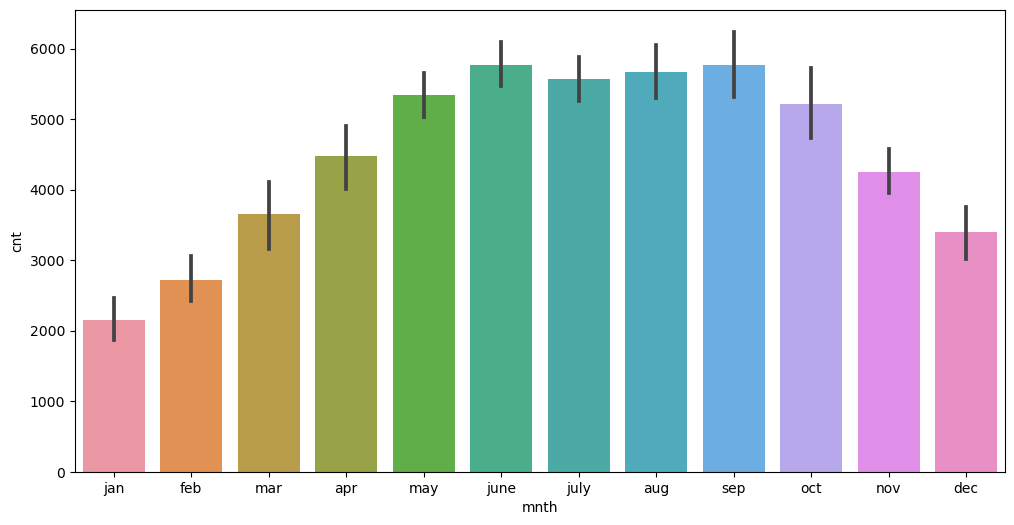

In [78]:
plt.figure(figsize = (12,6))
sns.barplot('mnth','cnt',data=bikesharinginitial_df)

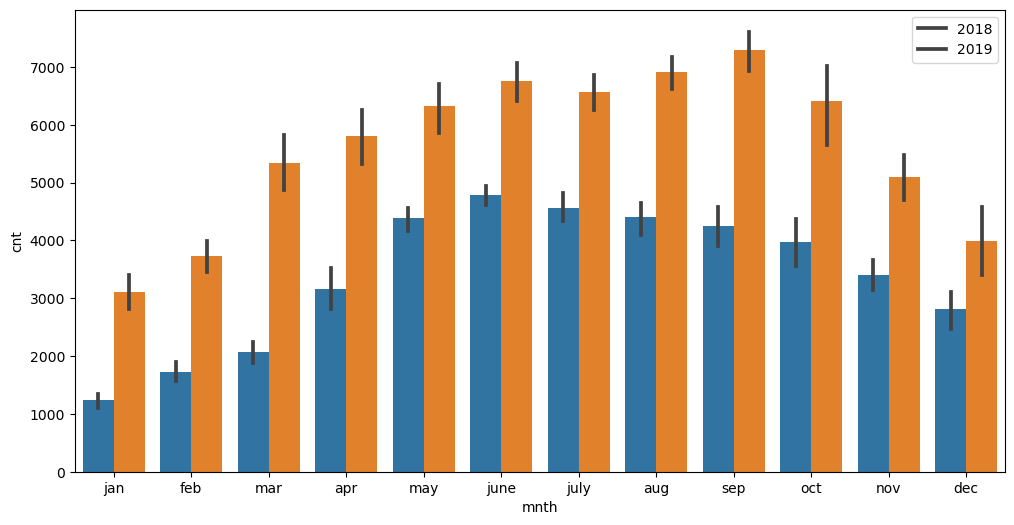

In [79]:
plt.figure(figsize = (12,6))
sns.barplot('mnth','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

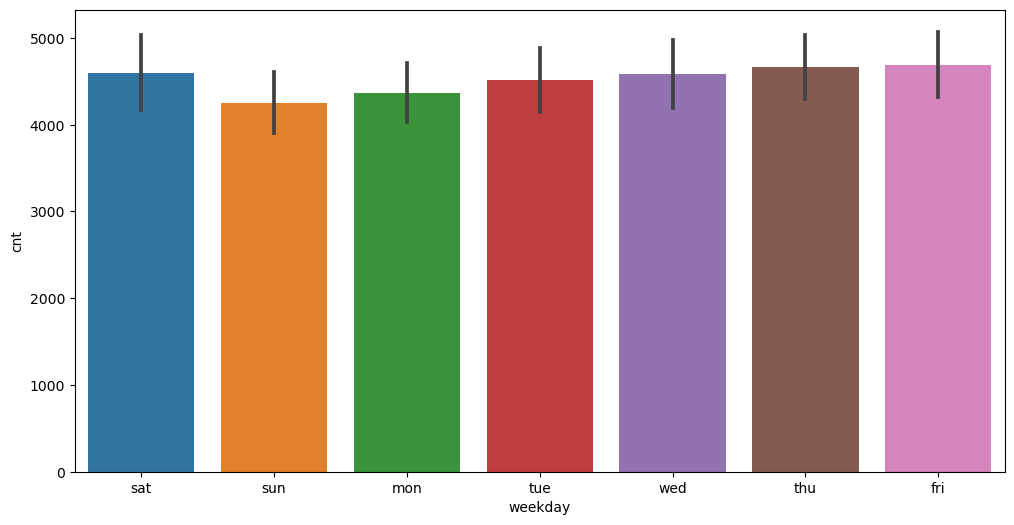

In [77]:
plt.figure(figsize = (12,6))
sns.barplot('weekday','cnt',data=bikesharinginitial_df)

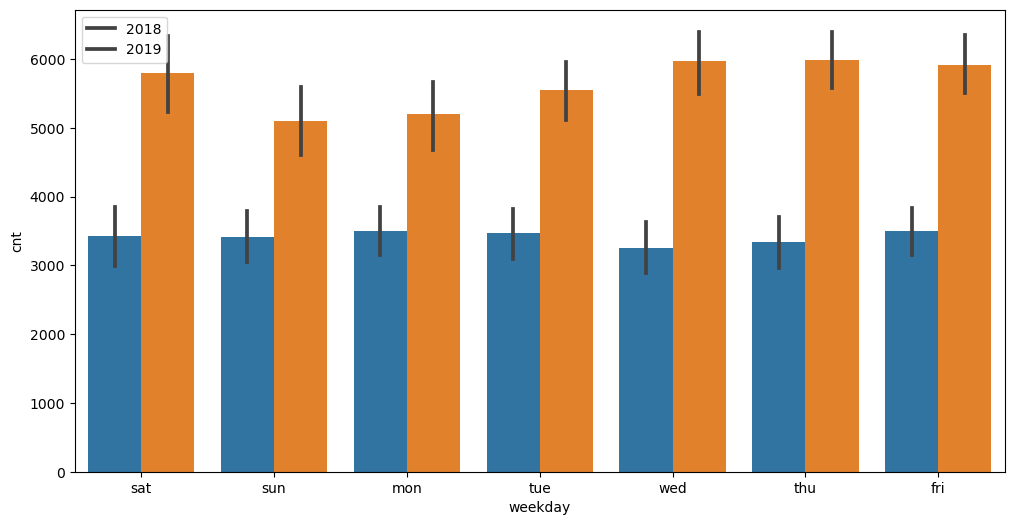

In [28]:
plt.figure(figsize = (12,6))
sns.barplot('weekday','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

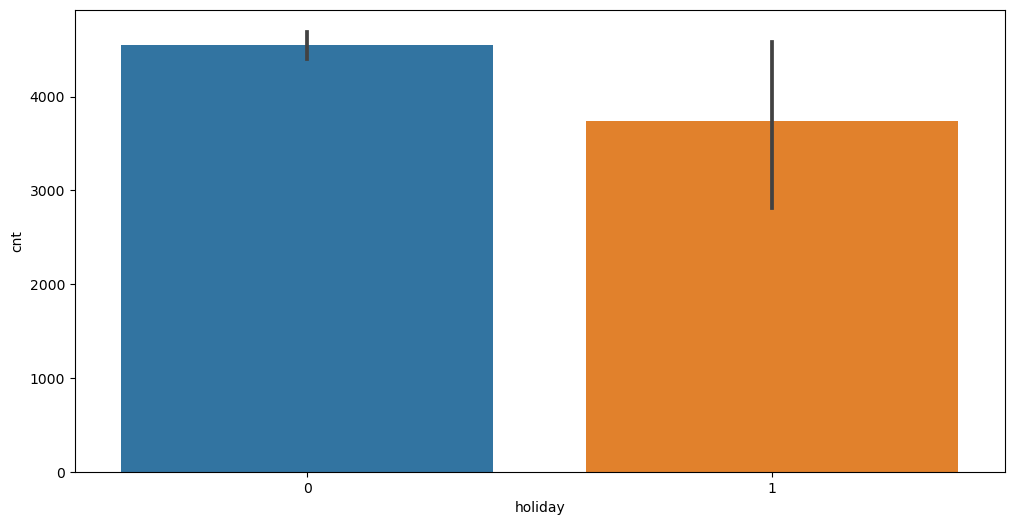

In [29]:
plt.figure(figsize = (12,6))
sns.barplot('holiday','cnt',data=bikesharinginitial_df)

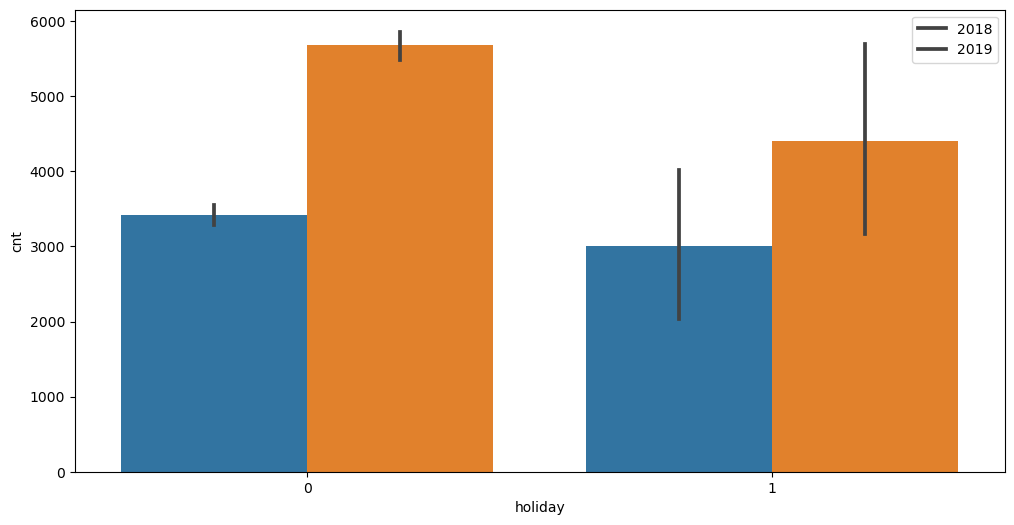

In [30]:
plt.figure(figsize = (12,6))
sns.barplot('holiday','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

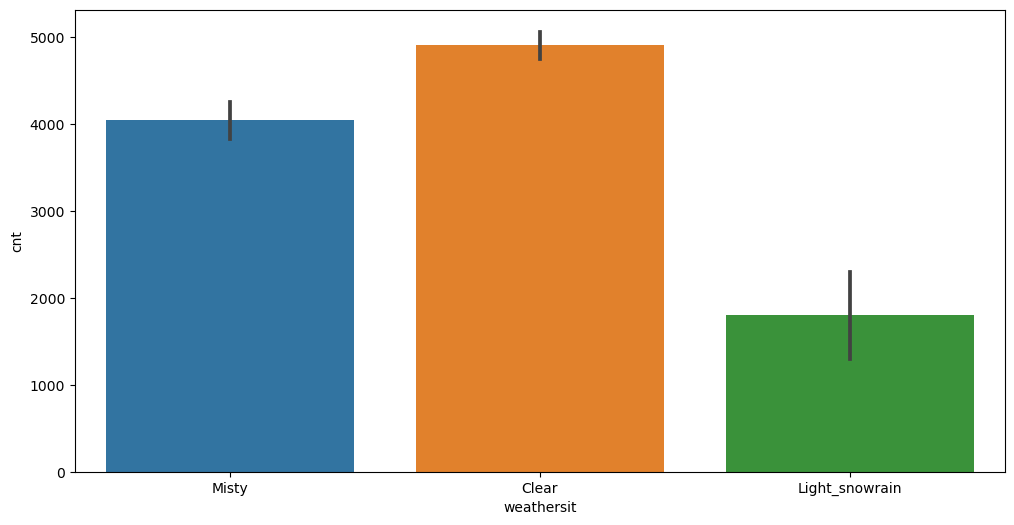

In [75]:
plt.figure(figsize = (12,6))
sns.barplot('weathersit','cnt',data=bikesharinginitial_df)

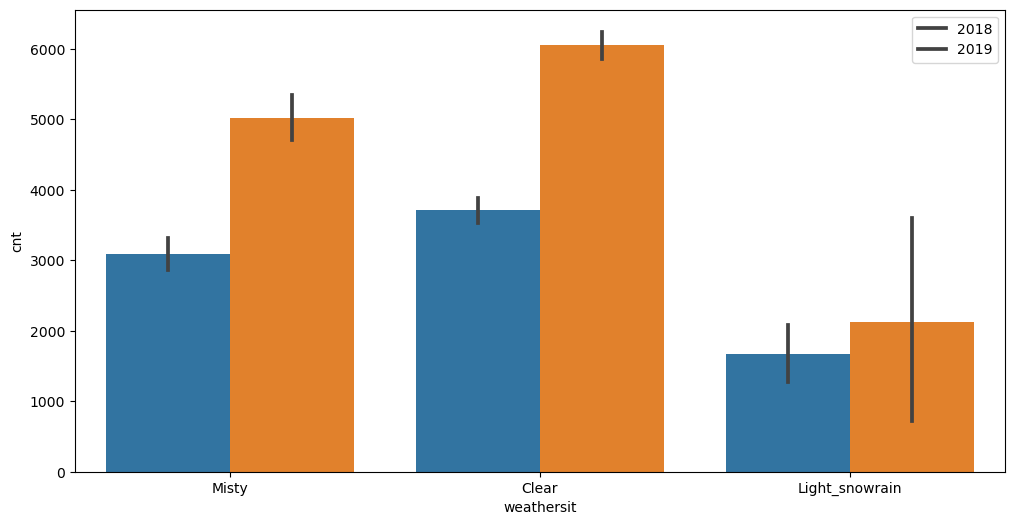

In [76]:
plt.figure(figsize = (12,6))
sns.barplot('weathersit','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

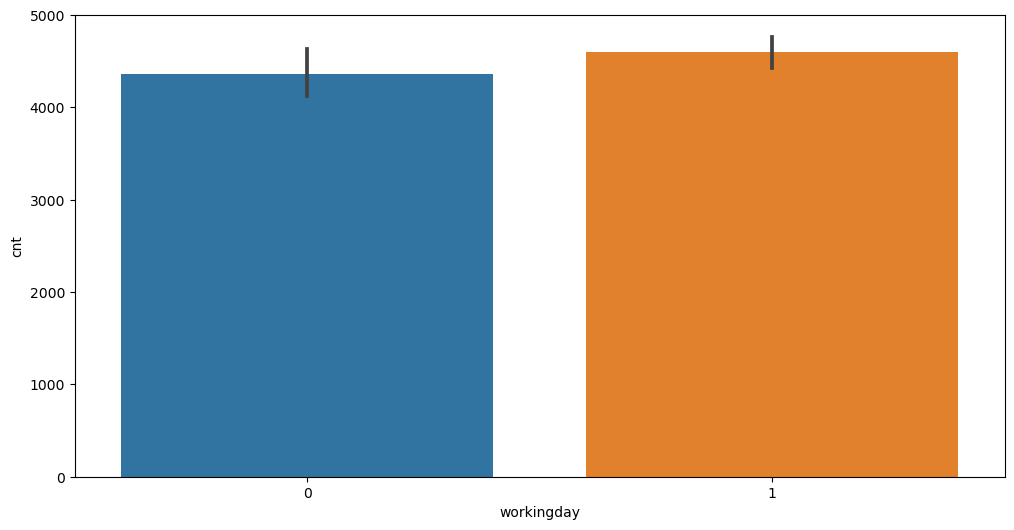

In [31]:
plt.figure(figsize = (12,6))
sns.barplot('workingday','cnt',data=bikesharinginitial_df)

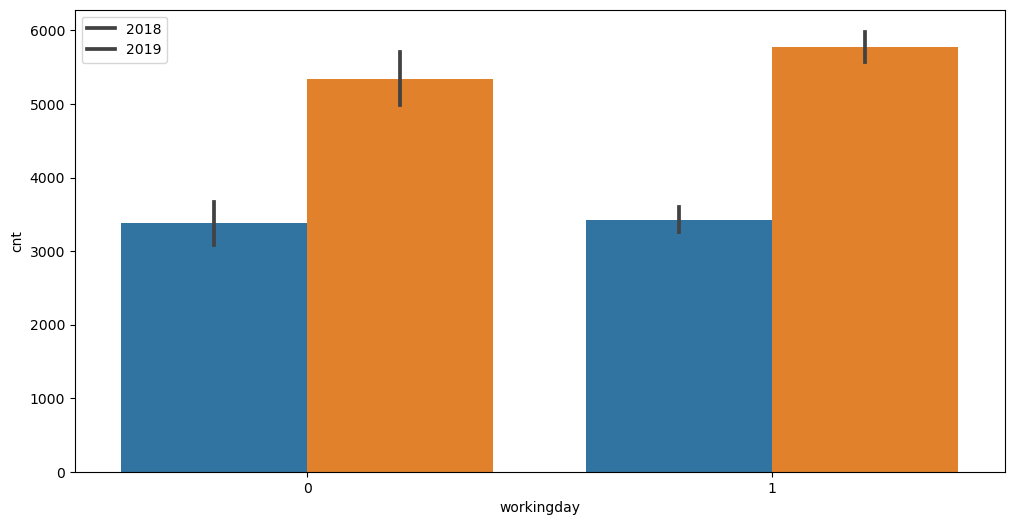

In [32]:
plt.figure(figsize = (12,6))
sns.barplot('workingday','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='dayofmonth', ylabel='cnt'>

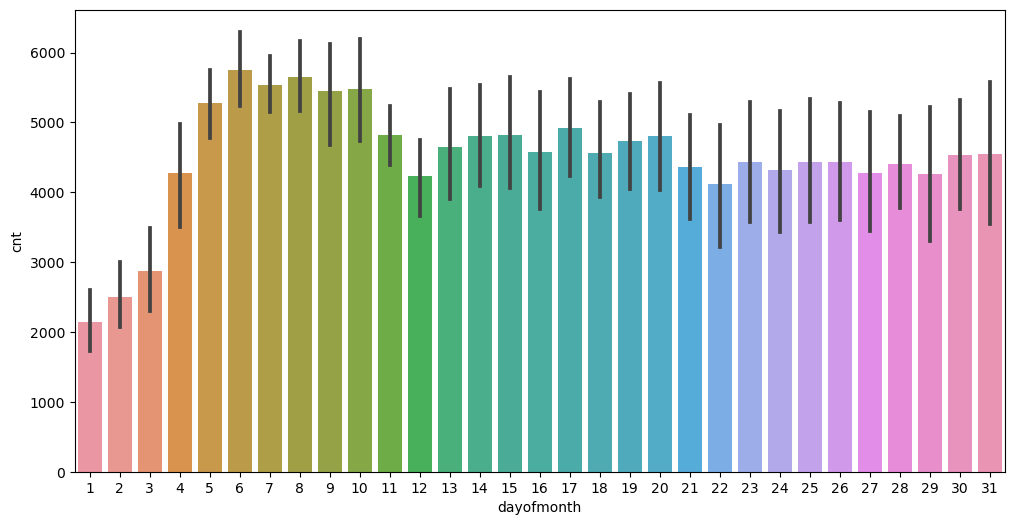

In [33]:
plt.figure(figsize = (12,6))
sns.barplot('dayofmonth','cnt',data=bikesharinginitial_df)

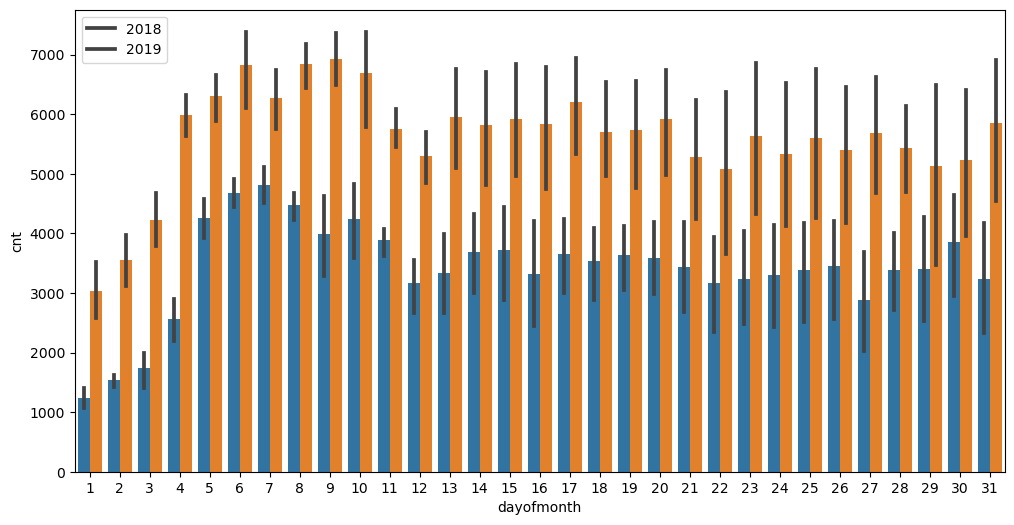

In [34]:
plt.figure(figsize = (12,6))
sns.barplot('dayofmonth','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

In [35]:
# Dummy variable creation for month, weekday, weathersit and season variables.
bikesharing_month_df=pd.get_dummies(bikesharinginitial_df.mnth,drop_first=True )
bikesharing_weekday_df=pd.get_dummies(bikesharinginitial_df.weekday,drop_first=True )
bikesharing_weathersit_df=pd.get_dummies(bikesharinginitial_df.weathersit,drop_first=True )
bikesharing_season_df=pd.get_dummies(bikesharinginitial_df.season,drop_first=True )
#bikesharing_dayofmonth_df=pd.get_dummies(bikesharinginitial_df.dayofmonth,drop_first=True )
bikesharing_final = pd.concat([bikesharinginitial_df,bikesharing_month_df,bikesharing_weekday_df,bikesharing_weathersit_df,bikesharing_season_df],axis=1)
bikesharing_final

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,65.2917,23.458911,...,0,0,1,0,0,0,1,1,0,0
726,spring,1,dec,0,fri,1,Misty,10.386653,59.0000,10.416557,...,0,0,0,0,0,0,1,1,0,0
727,spring,1,dec,0,sat,0,Misty,10.386653,75.2917,8.333661,...,1,0,0,0,0,0,1,1,0,0
728,spring,1,dec,0,sun,0,Clear,10.489153,48.3333,23.500518,...,0,1,0,0,0,0,0,1,0,0


In [36]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bikesharing_final.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikesharing_final

,yr,holiday,workingday,temp,hum,windspeed,cnt,dayofmonth,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,27,0,1,...,0,0,1,0,0,0,1,1,0,0
726,1,0,1,10.386653,59.0000,10.416557,3095,28,0,1,...,0,0,0,0,0,0,1,1,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,29,0,1,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,30,0,1,...,0,1,0,0,0,0,0,1,0,0


# 2) Model building and evaluation

In [37]:
Y=bikesharing_final.pop('cnt')
X=bikesharing_final
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.7, random_state=100)

In [38]:
# Rescaling the features
scaler = MinMaxScaler()
bikesharing_final.head()

,yr,holiday,workingday,temp,hum,windspeed,dayofmonth,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [39]:
# Scaling numerical variable and Fit and transform training set only 

variables = ['temp','hum','windspeed']
bikesharing_final[variables] = scaler.fit_transform(bikesharing_final[variables])
bikesharing_final.head()

,yr,holiday,workingday,temp,hum,windspeed,dayofmonth,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,0.355170,0.828620,0.358625,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0.379232,0.715771,0.587465,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,0.171000,0.449638,0.586868,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.175530,0.607131,0.358236,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0.209120,0.449313,0.427345,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## RFE and Automated approach

In [40]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
rfe = RFE(lr,n_features_to_select=20)
rfe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('hum', False, 8),
 ('windspeed', False, 6),
 ('dayofmonth', False, 10),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', False, 4),
 ('june', True, 1),
 ('mar', False, 7),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 5),
 ('tue', False, 2),
 ('wed', False, 9),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [43]:
#checking columns selected via RFE
columns=X_train.columns[rfe.support_]
print(columns)

Index(['yr', 'holiday', 'workingday', 'aug', 'dec', 'feb', 'jan', 'june',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [44]:
# checking rejected columns
X_train.columns[~rfe.support_]

Index(['temp', 'hum', 'windspeed', 'dayofmonth', 'july', 'mar', 'thu', 'tue',
       'wed'],
      dtype='object')

In [45]:
def buildmodel(cols):
    X_train_rfe=X_train[cols]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lr=sm.OLS(Y_train,X_train_rfe.astype(float)).fit()
    return lr

In [46]:
#Detecting Multicollinearity with VIF
def calc_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [47]:
lr1=buildmodel(columns)
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.12e-155
Time:                        20:52:26   Log-Likelihood:                -4141.6
No. Observations:                 505   AIC:                             8323.
Df Residuals:                     485   BIC:                             8408.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3607.4513    116.030     31.091      0.000    3379.468    3835.435
yr              2121.3864     80.904     26.221      0.000    1962.420    2280.353
holiday          782.7942    191.089      4.096      0.000     407.329    1158.259
workingday      1136.6060     73.221     15.523      0.000     992.736    1280.476
aug              201.1572    184.627      1.090      0.276    -161.611     563.925
dec            -1320.3144    235.604     -5.604      0.000   -1783.245    -857.384
feb             -825.0670    226.282     -3.646      0.000   -1269.682    -380.452
jan            -1330.6365    217.682     -6.113      0.000   -1758.352    -902.921
june             766.3404    176.459      4.343      0.000     419.621    1113.060
may              721.3549    174.753      4.128      0.000     377.988    1064.722
nov            -1574.2325    283.743     -5.548      0.000   -2131.750   -1016.715
oct             -398.3374    284.976     -1.398      0.163    -958.277     161.603
sep              473.5232    186.920      2.533      0.012     106.251     840.795
mon             -265.6320    120.528     -2.204      0.028    -502.454     -28.810
sat             1046.1482    105.007      9.963      0.000     839.823    1252.473
sun              641.9029    103.996      6.172      0.000     437.565     846.241
Light_snowrain -2815.4860    244.847    -11.499      0.000   -3296.577   -2334.395
Misty           -791.2731     86.496     -9.148      0.000    -961.226    -621.320
spring         -1800.0672    198.941     -9.048      0.000   -2190.959   -1409.175
summer          -771.5404    158.105     -4.880      0.000   -1082.196    -460.885
winter           339.4465    251.243      1.351      0.177    -154.213     833.106
==============================================================================
Omnibus:                       91.607   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.616
Skew:                          -0.862   Prob(JB):                     7.73e-59
Kurtosis:                       6.122   Cond. No.                     2.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
calc_vif(columns)

          Features   VIF
2       workingday  8.54
19          winter  7.44
17          spring  4.39
9              nov  4.07
10             oct  3.86
4              dec  3.03
18          summer  2.95
14             sun  2.41
13             sat  2.33
6              jan  2.20
5              feb  2.00
3              aug  1.76
11             sep  1.66
8              may  1.55
1          holiday  1.48
7             june  1.28
12             mon  1.16
15  Light_snowrain  1.08
16           Misty  1.08
0               yr  1.02


### Model 2

In [49]:
# VIF > 5 , P-value > 0.05

In [50]:
# High VIF and high P-value columns : winter
# low VIF and high P-value columns : oct,aug
# High VIF and low P-value columns : workingday
# low VIF and low P-value columns : spring,nov,dec,summer,sun,sat,jan,feb,sep,may,holiday,june,mon,Light_snowrain,Misty,yr

In [51]:
# winter has highest VIF and P value >0.05 so dropping the column
columns_2 = columns.drop(['winter'])
lr2=buildmodel(columns_2)
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 17 May 2023   Prob (F-statistic):          7.34e-156
Time:                        20:52:26   Log-Likelihood:                -4142.6
No. Observations:                 505   AIC:                             8323.
Df Residuals:                     486   BIC:                             8403.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3638.4035    113.842     31.960      0.000    3414.720    3862.087
yr              2119.3911     80.960     26.178      0.000    1960.317    2278.465
holiday          766.6137    190.876      4.016      0.000     391.570    1141.657
workingday      1154.2425     72.110     16.007      0.000    1012.558    1295.927
aug              152.0998    181.175      0.840      0.402    -203.883     508.083
dec            -1096.9873    168.030     -6.529      0.000   -1427.142    -766.832
feb             -740.0558    217.543     -3.402      0.001   -1167.496    -312.616
jan            -1245.3699    208.509     -5.973      0.000   -1655.061    -835.679
june             746.4930    175.996      4.242      0.000     400.686    1092.300
may              714.7537    174.833      4.088      0.000     371.231    1058.276
nov            -1280.6882    182.651     -7.012      0.000   -1639.571    -921.806
oct             -107.8776    187.222     -0.576      0.565    -475.742     259.987
sep              489.9474    186.682      2.625      0.009     123.144     856.751
mon             -262.5162    120.608     -2.177      0.030    -499.495     -25.538
sat             1062.0185    104.436     10.169      0.000     856.816    1267.221
sun              655.5288    103.593      6.328      0.000     451.982     859.075
Light_snowrain -2812.9088    245.047    -11.479      0.000   -3294.391   -2331.426
Misty           -785.5508     86.466     -9.085      0.000    -955.443    -615.658
spring         -1933.6273    172.788    -11.191      0.000   -2273.131   -1594.124
summer          -814.2363    155.046     -5.252      0.000   -1118.880    -509.593
==============================================================================
Omnibus:                       91.741   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.381
Skew:                          -0.869   Prob(JB):                     6.42e-58
Kurtosis:                       6.082   Cond. No.                     2.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
calc_vif(columns_2)

          Features   VIF
2       workingday  7.99
17          spring  3.31
18          summer  2.83
14             sun  2.31
13             sat  2.23
6              jan  2.02
5              feb  1.85
3              aug  1.69
9              nov  1.68
10             oct  1.66
11             sep  1.65
8              may  1.54
4              dec  1.54
1          holiday  1.47
7             june  1.28
12             mon  1.16
15  Light_snowrain  1.08
16           Misty  1.08
0               yr  1.02


### Model 3

In [53]:
# High VIF and high P-value columns : none
# low VIF and high P-value columns : oct,aug
# High VIF and low P-value columns : workingday
# low VIF and low P-value columns : spring,nov,dec,summer,sun,sat,jan,feb,sep,may,holiday,june,mon,Light_snowrain,Misty,yr

In [54]:
#oct high p-value so dropping the column
columns_3 = columns_2.drop(['oct'])
lr3=buildmodel(columns_3)
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     113.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          8.01e-157
Time:                        20:52:26   Log-Likelihood:                -4142.8
No. Observations:                 505   AIC:                             8322.
Df Residuals:                     487   BIC:                             8398.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3603.4056     96.219     37.450      0.000    3414.350    3792.461
yr              2118.8672     80.899     26.192      0.000    1959.913    2277.821
holiday          756.9534    190.007      3.984      0.000     383.618    1130.289
workingday      1145.3707     70.398     16.270      0.000    1007.049    1283.692
aug              198.0533    162.566      1.218      0.224    -121.363     517.470
dec            -1060.1759    155.304     -6.826      0.000   -1365.325    -755.026
feb             -726.8106    216.176     -3.362      0.001   -1151.564    -302.057
jan            -1231.7522    207.023     -5.950      0.000   -1638.522    -824.983
june             763.8596    173.277      4.408      0.000     423.396    1104.323
may              719.8053    174.493      4.125      0.000     376.952    1062.658
nov            -1234.2745    163.817     -7.534      0.000   -1556.149    -912.400
sep              537.4481    167.379      3.211      0.001     208.574     866.322
mon             -263.0645    120.522     -2.183      0.030    -499.872     -26.257
sat             1053.7949    103.386     10.193      0.000     850.658    1256.932
sun              647.2867    102.531      6.313      0.000     445.829     848.744
Light_snowrain -2830.1248    243.052    -11.644      0.000   -3307.685   -2352.565
Misty           -791.3005     85.829     -9.220      0.000    -959.941    -622.660
spring         -1900.5692    162.873    -11.669      0.000   -2220.590   -1580.548
summer          -772.6835    137.160     -5.633      0.000   -1042.182    -503.185
==============================================================================
Omnibus:                       94.750   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.755
Skew:                          -0.885   Prob(JB):                     6.57e-62
Kurtosis:                       6.203   Cond. No.                     1.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
calc_vif(columns_3)

          Features   VIF
2       workingday  5.52
16          spring  2.94
17          summer  2.22
6              jan  1.99
5              feb  1.83
13             sun  1.81
12             sat  1.74
8              may  1.54
9              nov  1.36
3              aug  1.36
1          holiday  1.35
10             sep  1.33
4              dec  1.32
7             june  1.24
11             mon  1.16
15           Misty  1.07
14  Light_snowrain  1.06
0               yr  1.02


### Model 4

In [56]:
# High VIF and high P-value columns : none
# low VIF and high P-value columns : aug
# High VIF and low P-value columns : workingday
# low VIF and low P-value columns : spring,nov,dec,summer,sun,sat,jan,feb,sep,may,holiday,june,mon,Light_snowrain,Misty,yr

In [57]:
#aug has highest p-value
columns_4 = columns_3.drop(['aug'])
lr4=buildmodel(columns_4)
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     120.1
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.50e-157
Time:                        20:52:26   Log-Likelihood:                -4143.5
No. Observations:                 505   AIC:                             8321.
Df Residuals:                     488   BIC:                             8393.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3651.0289     87.965     41.506      0.000    3478.193    3823.865
yr              2120.8929     80.922     26.209      0.000    1961.894    2279.891
holiday          759.2567    190.092      3.994      0.000     385.756    1132.757
workingday      1161.5424     69.170     16.793      0.000    1025.635    1297.450
dec            -1109.4760    150.014     -7.396      0.000   -1404.229    -814.723
feb             -746.7260    215.664     -3.462      0.001   -1170.471    -322.981
jan            -1251.3683    206.499     -6.060      0.000   -1657.105    -845.632
june             735.7133    171.815      4.282      0.000     398.124    1073.302
may              710.9550    174.429      4.076      0.000     368.231    1053.679
nov            -1297.0745    155.572     -8.337      0.000   -1602.749    -991.400
sep              473.9893    159.147      2.978      0.003     161.292     786.687
mon             -256.2359    120.451     -2.127      0.034    -492.903     -19.569
sat             1068.0520    102.772     10.392      0.000     866.121    1269.983
sun              662.1778    101.850      6.501      0.000     462.059     862.297
Light_snowrain -2860.6021    241.881    -11.826      0.000   -3335.859   -2385.345
Misty           -790.6102     85.870     -9.207      0.000    -959.330    -621.890
spring         -1946.0211    158.621    -12.268      0.000   -2257.686   -1634.356
summer          -829.1918    129.143     -6.421      0.000   -1082.937    -575.446
==============================================================================
Omnibus:                       97.961   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.390
Skew:                          -0.912   Prob(JB):                     1.96e-64
Kurtosis:                       6.258   Cond. No.                     1.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.84e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
calc_vif(columns_4)

          Features   VIF
2       workingday  4.35
15          spring  2.79
5              jan  1.98
16          summer  1.96
4              feb  1.82
12             sun  1.58
7              may  1.54
11             sat  1.52
1          holiday  1.31
3              dec  1.23
8              nov  1.22
6             june  1.22
9              sep  1.20
10             mon  1.15
14           Misty  1.07
13  Light_snowrain  1.05
0               yr  1.02


In [59]:
# High VIF and high P-value columns : none
# low VIF and high P-value columns : none
# High VIF and low P-value columns : none
# low VIF and low P-value columns : spring,nov,dec,summer,sun,sat,jan,feb,sep,may,holiday,june,mon,Light_snowrain,Misty,yr

In [60]:
lr4.params

const             3651.028863
yr                2120.892888
holiday            759.256742
workingday        1161.542385
dec              -1109.475967
feb               -746.726005
jan              -1251.368347
june               735.713286
may                710.955011
nov              -1297.074484
sep                473.989343
mon               -256.235898
sat               1068.051975
sun                662.177761
Light_snowrain   -2860.602131
Misty             -790.610186
spring           -1946.021055
summer            -829.191848
dtype: float64

In [61]:
# Building final model

In [62]:
cols=['spring','nov','dec','summer','sun','sat','jan','feb','sep','may','holiday','june','mon','Light_snowrain','Misty','yr']
#Build a model with above columns
lr_sk = LinearRegression()
lr_sk.fit(X_train[cols],Y_train)

LinearRegression()

Residual Analysis

In [63]:
Y_train_pred = lr_sk.predict(X_train[cols])

In [64]:
r2_score(Y_train,Y_train_pred)

0.7974338182664693

Text(0.5, 0, 'Errors')

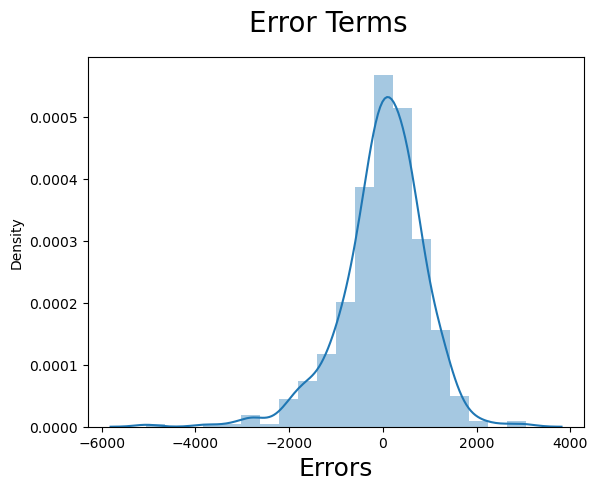

In [65]:
# Plotting error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

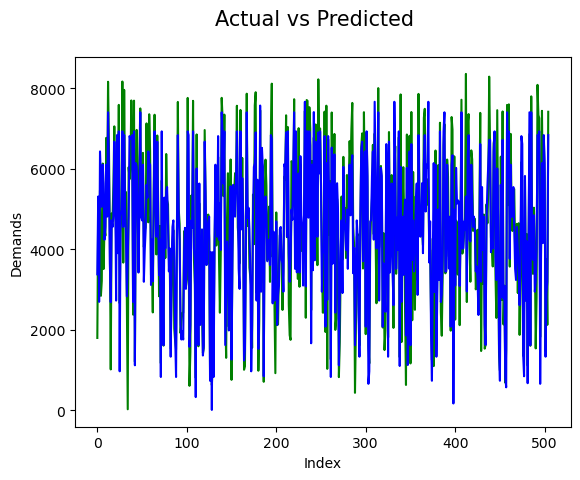

In [66]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,Y_train, color="green")
plt.plot(c,Y_train_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Errors are normally distributed, so the model seems ok

Linearity Check

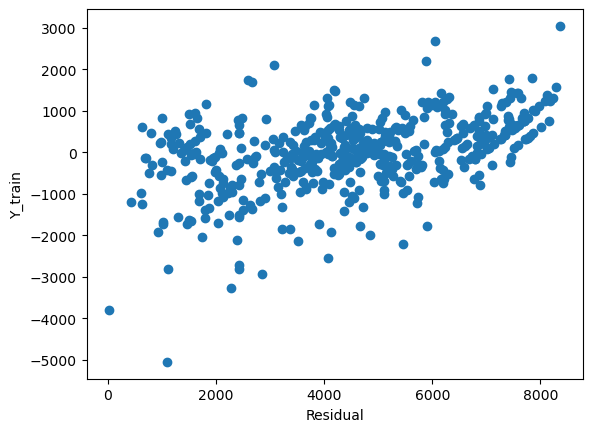

In [67]:
residual = (Y_train - Y_train_pred)
plt.scatter(Y_train,residual)
plt.ylabel("Y_train")
plt.xlabel("Residual")
plt.show()

Check on Test Data set

In [68]:
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [69]:
cols=['spring','nov','dec','summer','sun','sat','jan','feb','sep','may','holiday','june','mon','Light_snowrain','Misty','yr']

#Predict the values for test data
Y_test_pred = lr_sk.predict(X_test[cols])

R2 value

In [70]:
r2_score(Y_test,Y_test_pred)

0.8321452828205756

Text(0, 0.5, 'y_test_pred')

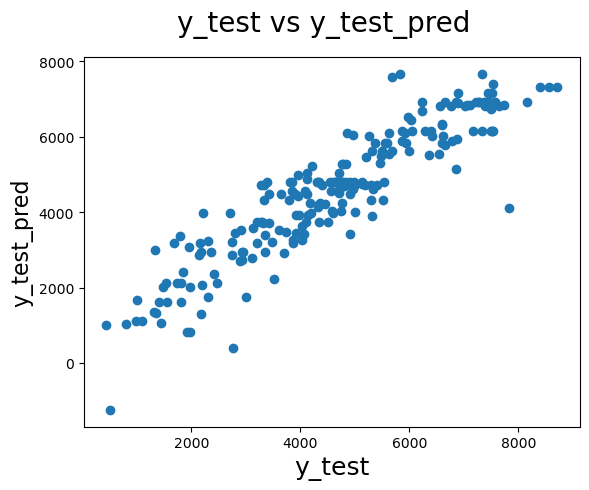

In [71]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

Above fig Shows a Linear relationship

Plotting Actual vs Predicted test data

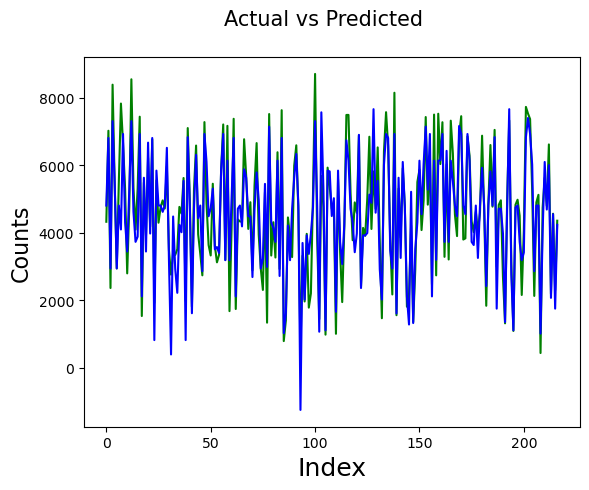

In [72]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,Y_test, color="green")
plt.plot(c,Y_test_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18)                   
plt.ylabel('Counts', fontsize=16) 
plt.show()

Predected Data above seems very close to actual

##### Making Predictions

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.797
- Test dataset R^2           : 0.832

Conclusion
Significant variables to predict the demand for shared bikes
- Year (2019)
- months('dec','feb','jan','june','may','nov','sep','jun')
- Days ('mon','sun','sat')
- weathersit ('Light_snowrain','Misty')
- season('spring','summer')
- holiday